In [3]:
%%capture
pip install snowflake-connector-python pandas scikit-learn


In [4]:
%%capture
pip install snowflake-sqlalchemy

In [61]:
import snowflake.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import sys
sys.path.append('/content')  # This adds the /content folder to the Python path





In [57]:
import os
print(os.listdir('/content'))

['.config', 'sample_data']


In [58]:

print(data.head())

   age    sex  cp  trestbps  chol    fbs  restecg  thalach  exang  oldpeak  \
0   63   True   3       145   233   True        0      150  False      2.3   
1   37   True   2       130   250  False        1      187  False      3.5   
2   41  False   1       130   204  False        0      172  False      1.4   
3   56   True   1       120   236  False        1      178  False      0.8   
4   57  False   0       120   354  False        1      163   True      0.6   

   slope     ca  thal  target  
0      0  False     1       1  
1      0  False     2       1  
2      2  False     2       1  
3      2  False     2       1  
4      2  False     2       1  


In [62]:
data.target.value_counts()

,count
target,
1,151
0,89


In [63]:
data.groupby('sex')['target'].mean()

,target
sex,
False,0.848101
True,0.521739


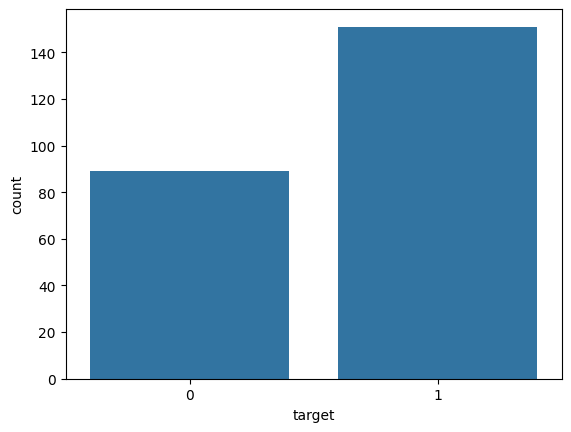

In [65]:
sns.countplot(data=data, x='target');

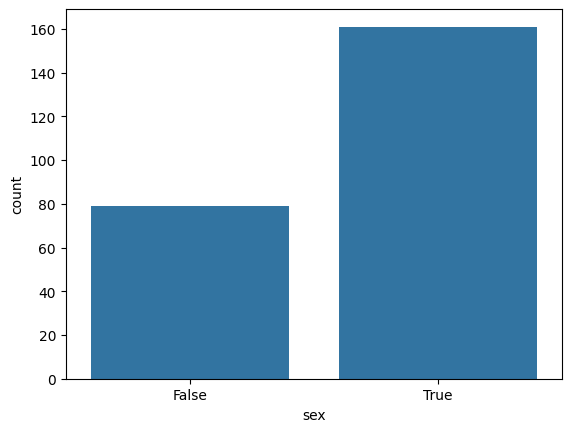

In [66]:
sns.countplot(data=data, x='sex');

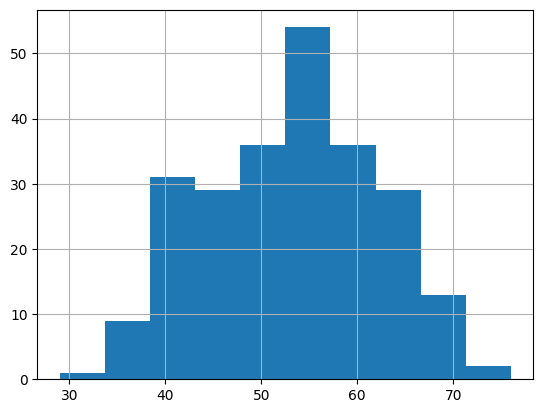

In [67]:
data['age'].hist();

In [68]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [15]:
np.shape(X)

(240, 13)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=380)

In [20]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
from sklearn import metrics

In [22]:
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.46      0.52        24
           1       0.69      0.81      0.74        36

    accuracy                           0.67        60
   macro avg       0.65      0.63      0.63        60
weighted avg       0.66      0.67      0.66        60



In [23]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50        24
           1       0.68      0.83      0.75        36

    accuracy                           0.67        60
   macro avg       0.65      0.62      0.62        60
weighted avg       0.66      0.67      0.65        60



In [24]:
from sklearn.svm import SVC

In [25]:
clf = SVC(C=15, kernel='linear', random_state=3244)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79        24
           1       0.83      0.94      0.88        36

    accuracy                           0.85        60
   macro avg       0.86      0.83      0.84        60
weighted avg       0.86      0.85      0.85        60



In [26]:
clf = SVC(C=15, kernel='linear', random_state=3244, probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79        24
           1       0.83      0.94      0.88        36

    accuracy                           0.85        60
   macro avg       0.86      0.83      0.84        60
weighted avg       0.86      0.85      0.85        60



In [27]:
clf.predict_proba(X_test)

array([[0.10918272, 0.89081728],
       [0.21826665, 0.78173335],
       [0.03193387, 0.96806613],
       [0.43439835, 0.56560165],
       [0.85736236, 0.14263764],
       [0.47912278, 0.52087722],
       [0.83231799, 0.16768201],
       [0.02253619, 0.97746381],
       [0.84251323, 0.15748677],
       [0.08619622, 0.91380378],
       [0.31944437, 0.68055563],
       [0.20863816, 0.79136184],
       [0.61247028, 0.38752972],
       [0.54898127, 0.45101873],
       [0.51468342, 0.48531658],
       [0.07779298, 0.92220702],
       [0.13126632, 0.86873368],
       [0.05278993, 0.94721007],
       [0.12066124, 0.87933876],
       [0.98051434, 0.01948566],
       [0.80602589, 0.19397411],
       [0.03489107, 0.96510893],
       [0.95517857, 0.04482143],
       [0.31247409, 0.68752591],
       [0.33030101, 0.66969899],
       [0.10863339, 0.89136661],
       [0.23762922, 0.76237078],
       [0.27845509, 0.72154491],
       [0.16288427, 0.83711573],
       [0.11507275, 0.88492725],
       [0.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [29]:
params = {
    'C': [1, 5, 10, 15],
    'kernel': ['linear'],
    'gamma': ['auto', 0.1, 0.5]
}
gsh = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=2, n_jobs=-1, verbose=10)

In [30]:
gsh.fit(X, y)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 15], 'gamma': ['auto', 0.1, 0.5],
                         'kernel': ['linear']},
             scoring='accuracy', verbose=10)

In [31]:
gsh.best_estimator_

SVC(C=1, gamma='auto', kernel='linear')

In [32]:
gsh.best_score_

0.8500000000000001

In [33]:
gsh.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [34]:
svc = SVC(C=1, gamma='auto', kernel='linear')
svc.fit(X, y)

SVC(C=1, gamma='auto', kernel='linear')

In [ ]:
# Faranak Bakhtiari